<a href="https://colab.research.google.com/github/SAJAD-52/Haberman_s_Breast_Cancer_Survival_Prediction.ipynb/blob/main/Haberman_s_Breast_Cancer_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import math
from sklearn import  metrics

In [ ]:
data1 = pd.read_csv("haberman.csv")
data1['status'].value_counts()

1    224
2     81
Name: status, dtype: int64

In [ ]:
data1

,age,year,nodes,status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [ ]:
print(data1.head())

   age  year  nodes  status
0   30    62      3       1
1   30    65      0       1
2   31    59      2       1
3   31    65      4       1
4   33    58     10       1


In [ ]:
import seaborn as sns

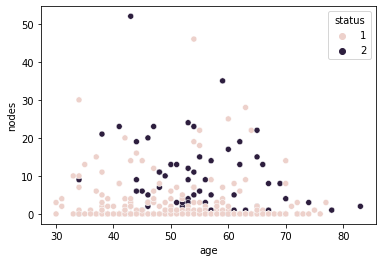

In [ ]:
sns.scatterplot(x="age", y="nodes", hue="status", data=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


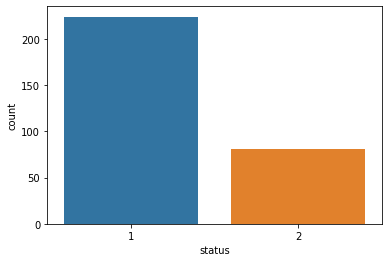

In [ ]:
sns.countplot(data1['status'])


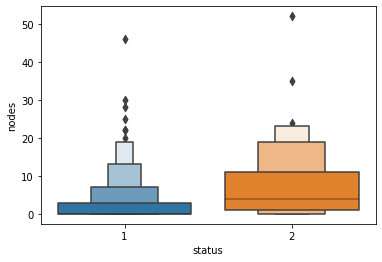

In [ ]:
sns.boxenplot(x="status", y="nodes", data=data1 )
plt.show()

<function matplotlib.pyplot.show>

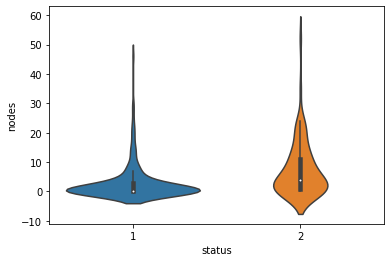

In [ ]:
sns.violinplot(x='status', y='nodes', data=data1, size=8)
plt.show

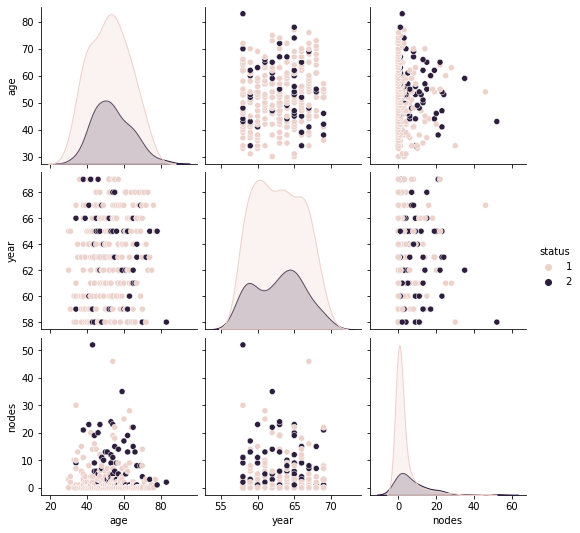

In [ ]:
sns.pairplot(data1, hue='status', vars=['age', 'year', 'nodes'])

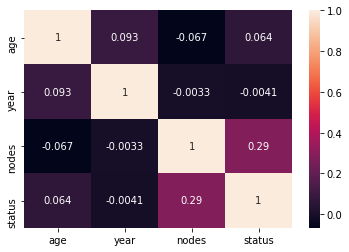

In [ ]:
sns.heatmap(data1.corr(), annot=True)

In [ ]:
#building our model


In [ ]:
#devive our dataset into two categories x and y
dataF = pd.DataFrame(data1, columns=['age', 'year', 'nodes', 'status'])

In [ ]:
x = dataF.drop(['status'], axis=1)

In [ ]:
y = dataF['status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)

In [ ]:
x_train.shape

(244, 3)

In [ ]:
y_train.shape

(244,)

In [ ]:
y_test.shape

(61,)

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svc_model = SVC(gamma='auto')

time - 0.007963895797729492


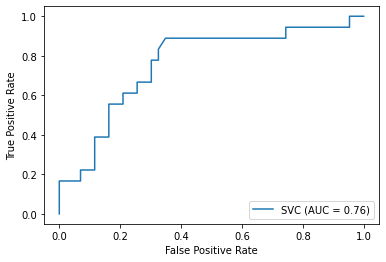

In [ ]:
import time
start_time = time.time()
svc_model.fit(x_train, y_train)
print("time - {}".format(time.time()-start_time))
metrics.plot_roc_curve(svc_model, x_test, y_test)


In [ ]:
y_predict = svc_model.predict(x_test)
y_predict.shape

(61,)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
mean_squared_error(y_test, y_predict)
mean_absolute_error(y_test, y_predict)

0.2786885245901639

In [ ]:
from math import sqrt
print(sqrt(metrics.mean_squared_error(y_test, y_predict)))
rse = math.sqrt(0.295081967213114/(242))
rse

0.5279095799378564


0.03491914907260795

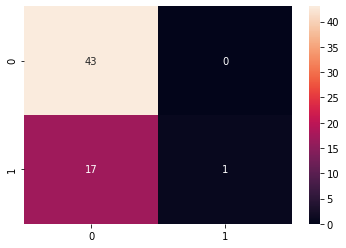

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

           1       0.72      1.00      0.83        43
           2       1.00      0.06      0.11        18

    accuracy                           0.72        61
   macro avg       0.86      0.53      0.47        61
weighted avg       0.80      0.72      0.62        61



In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
B = np.array([0.295081967213114, 0.22950819672131148, 0.26229508196721313, 0.29508196721311475, 0.2459016393442623])
norm_DF2 = pd.DataFrame(B)
norma_mse = min_max_scaler.fit_transform(norm_DF2)
print(norma_mse)

[[1.  ]
 [0.  ]
 [0.5 ]
 [1.  ]
 [0.25]]


In [ ]:
x_train_scaler = min_max_scaler.fit_transform(x_train)
x_test_scaler = min_max_scaler.fit_transform(x_test)
A = np.array([-0.41860465116279,-0.103359173126614,-0.260981912144702,0.41860465116279,-2.26785714285714])
norm_DF = pd.DataFrame(A)
norma_r2 = min_max_scaler.fit_transform(norm_DF)
print(norma_r2)

[[0.68835987]
 [0.80570584]
 [0.74703286]
 [1.        ]
 [0.        ]]


In [ ]:
start_time = time.time()
svc_model.fit(x_train_scaler, y_train)
print("time - {}".format(time.time()-start_time))


time - 0.005502462387084961


In [ ]:
y_predict_scaled = svc_model.predict(x_test_scaler)

In [ ]:
cm = confusion_matrix(y_test, y_predict_scaled)
mean_squared_error(y_test, y_predict_scaled)


0.29508196721311475

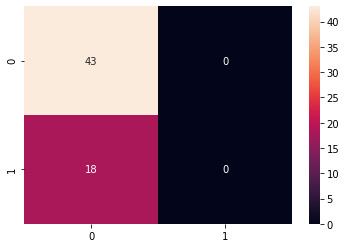

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_scaled))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83        43
           2       0.00      0.00      0.00        18

    accuracy                           0.70        61
   macro avg       0.35      0.50      0.41        61
weighted avg       0.50      0.70      0.58        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
start_time = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print("time - {}".format(time.time()-start_time))


time - 0.09028887748718262


In [ ]:
y_predict_KNN = knn.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_predict_KNN)
mean_absolute_error(y_test, y_predict_KNN)
print(sqrt(metrics.mean_squared_error(y_test, y_predict_KNN)))
rse = math.sqrt(0.229508196721311/(242))
rse

0.47907013758040845


0.030795794813370796

In [ ]:
cm2

array([[40,  3],
       [11,  7]])

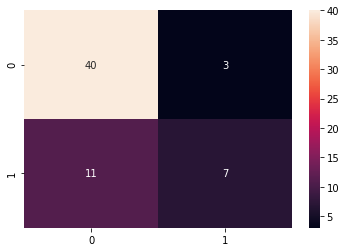

In [ ]:
sns.heatmap(cm2, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_KNN))

              precision    recall  f1-score   support

           1       0.78      0.93      0.85        43
           2       0.70      0.39      0.50        18

    accuracy                           0.77        61
   macro avg       0.74      0.66      0.68        61
weighted avg       0.76      0.77      0.75        61



In [ ]:
start_time = time.time()
knn.fit(x_train_scaler, y_train)
y_predict_KNN_scaled = knn.predict(x_test_scaler)
print("time - {}".format(time.time()-start_time))

time - 0.01018834114074707


In [ ]:
cm3 = confusion_matrix(y_test, y_predict_KNN_scaled)
mean_squared_error(y_test, y_predict_KNN_scaled)


0.22950819672131148

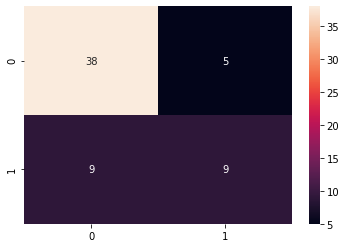

In [ ]:
sns.heatmap(cm3, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_KNN_scaled))

              precision    recall  f1-score   support

           1       0.81      0.88      0.84        43
           2       0.64      0.50      0.56        18

    accuracy                           0.77        61
   macro avg       0.73      0.69      0.70        61
weighted avg       0.76      0.77      0.76        61



In [ ]:
from sklearn import  metrics


In [ ]:
sc=metrics.accuracy_score(y_test, y_predict_KNN)
print(sc)


0.7704918032786885


In [ ]:
k_range = range(5, 25)

In [ ]:
acc_list = []

In [ ]:
for k in k_range:
  knn2 = KNeighborsClassifier(n_neighbors=k)
  knn2.fit(x_train, y_train)
  pred_y = knn2.predict(x_test)
  acc_list.append(metrics.accuracy_score(y_test, pred_y))

In [ ]:
print(acc_list)

[0.7704918032786885, 0.7377049180327869, 0.7377049180327869, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7540983606557377, 0.7540983606557377, 0.7540983606557377, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393]


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline


Text(0, 0.5, '[0.7704918032786885, 0.7377049180327869, 0.7377049180327869, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7704918032786885, 0.7540983606557377, 0.7540983606557377, 0.7540983606557377, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7704918032786885, 0.7540983606557377, 0.7704918032786885, 0.7868852459016393, 0.7868852459016393, 0.7868852459016393]')

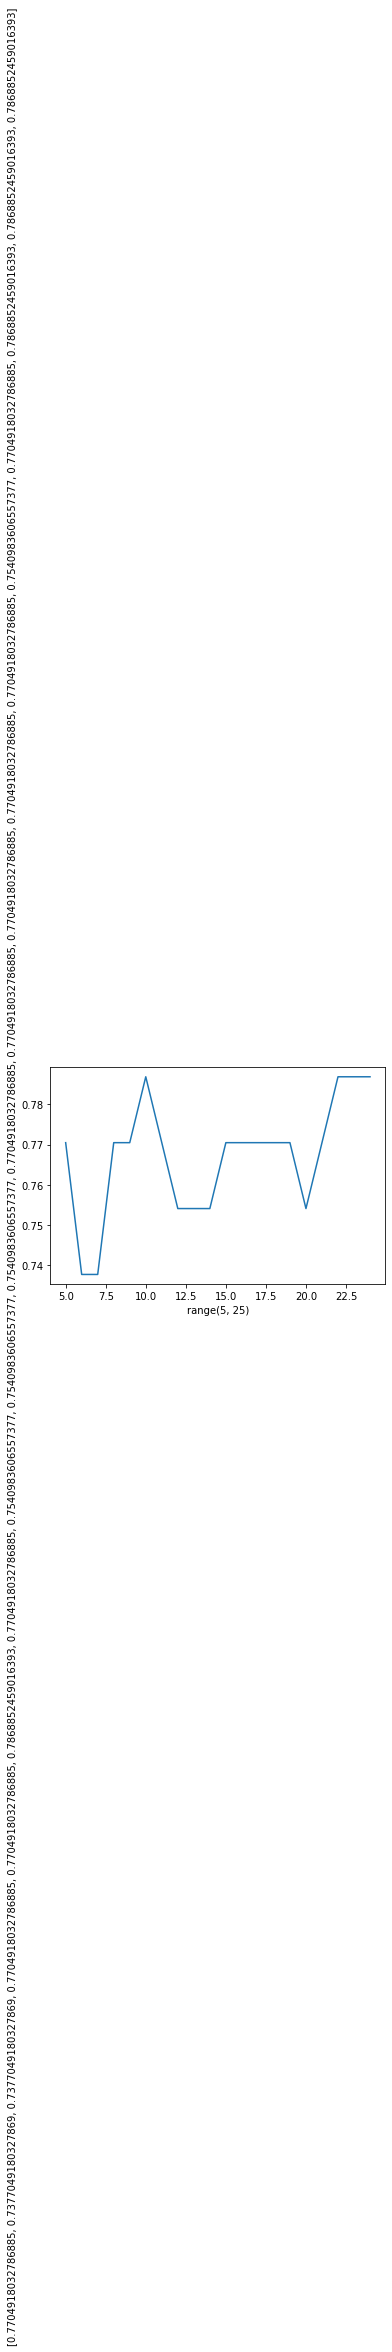

In [ ]:
plt.plot(k_range, acc_list)
plt.xlabel(k_range)
plt.ylabel(acc_list)

In [ ]:
print(max(acc_list))

0.7868852459016393


In [ ]:
print(min(acc_list))

0.7377049180327869


In [ ]:
#@title Titre par défaut
from sklearn.naive_bayes import GaussianNB
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=5)


In [ ]:
gnb = GaussianNB()

In [ ]:

start_time = time.time()
gnb.fit(x_train1, y_train1)
print("time - {}".format(time.time()-start_time))


time - 0.007672309875488281


In [ ]:
predict_y = gnb.predict(x_test1)

0.5121475197315839


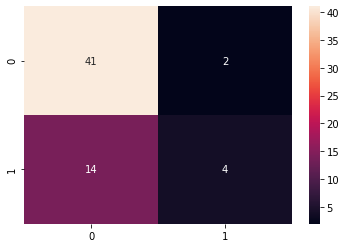

In [ ]:
cm4 = confusion_matrix(y_test1, predict_y)
sns.heatmap(cm4, annot=True)
mean_squared_error(y_test1, predict_y)
print(sqrt(metrics.mean_squared_error(y_test1, predict_y)))


In [ ]:
print(classification_report(y_test1, predict_y))
print(metrics.accuracy_score(y_test1, predict_y))

              precision    recall  f1-score   support

           1       0.75      0.95      0.84        43
           2       0.67      0.22      0.33        18

    accuracy                           0.74        61
   macro avg       0.71      0.59      0.59        61
weighted avg       0.72      0.74      0.69        61

0.7377049180327869


In [ ]:
x_train_scaler1 = min_max_scaler.fit_transform(x_train1)
x_test_scaler1 = min_max_scaler.fit_transform(x_test1)
rse = math.sqrt(0.262295081967213/(242))
rse

0.032922089470006737

In [ ]:

start_time = time.time()
gnb.fit(x_train_scaler1, y_train1)
print("time - {}".format(time.time()-start_time))

time - 0.002065420150756836


In [ ]:
predict_y_scaled = gnb.predict(x_test_scaler1)
print(predict_y_scaled)

[2 2 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1]


In [ ]:
y_test.shape

(61,)

In [ ]:
predict_y_scaled.shape

(61,)

In [ ]:
print(classification_report(y_test1, predict_y_scaled))
print(metrics.accuracy_score(y_test1, predict_y_scaled))
mean_squared_error(y_test1, predict_y_scaled)

              precision    recall  f1-score   support

           1       0.79      0.86      0.82        43
           2       0.57      0.44      0.50        18

    accuracy                           0.74        61
   macro avg       0.68      0.65      0.66        61
weighted avg       0.72      0.74      0.73        61

0.7377049180327869


0.26229508196721313

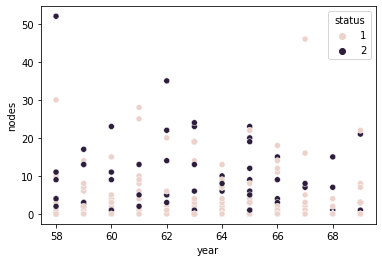

In [ ]:
sns.scatterplot(x='year', y='nodes', hue='status', data=data1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


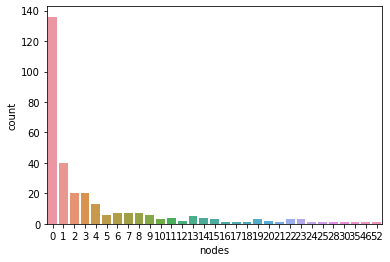

In [ ]:
sns.countplot(data1['nodes'])

In [ ]:
start_time = time.time()
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train1, y_train1)
print("time - {}".format(time.time()-start_time))


time - 0.31272435188293457


0.5432144762551112


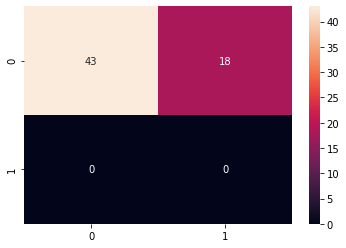

In [ ]:
predict_clf = clf.predict(x_test1)
cm = confusion_matrix(predict_clf, y_test)
print(sqrt(metrics.mean_squared_error(y_test1, predict_clf)))
mean_squared_error(y_test1, predict_clf)
rse = math.sqrt(0.295081967213114/(242))
rse
sns.heatmap(cm, annot=True)

In [ ]:
cm = confusion_matrix(y_test1, predict_clf)
start_time = time.time()
clf.fit(x_train_scaler1, y_train1)
predict_y_scaled2 = clf.predict(x_test_scaler1)
print("time - {}".format(time.time()-start_time))
print(classification_report(y_test1, predict_y_scaled2))
print(metrics.accuracy_score(y_test1, predict_y_scaled2))


time - 0.18066763877868652
              precision    recall  f1-score   support

           1       0.70      1.00      0.83        43
           2       0.00      0.00      0.00        18

    accuracy                           0.70        61
   macro avg       0.35      0.50      0.41        61
weighted avg       0.50      0.70      0.58        61

0.7049180327868853


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


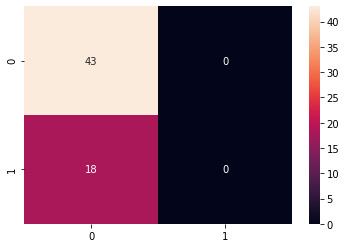

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test1, predict_clf))

              precision    recall  f1-score   support

           1       0.70      1.00      0.83        43
           2       0.00      0.00      0.00        18

    accuracy                           0.70        61
   macro avg       0.35      0.50      0.41        61
weighted avg       0.50      0.70      0.58        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(metrics.accuracy_score(y_test1, predict_clf))

0.7049180327868853


In [ ]:
import time
start_time = time.time()
from sklearn.neural_network import MLPClassifier
CLF = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
CLF.fit(x_train1, y_train1)
print("time - {}".format(time.time()-start_time))


time - 0.03582191467285156


In [ ]:
predit_ANN = CLF.predict(x_test1)
rse = math.sqrt(0.245901639344262/(242))
rse


0.031876676059921644

In [ ]:
cm = confusion_matrix(predit_ANN, y_test1)
mean_squared_error(predit_ANN, y_test1)
print(sqrt(metrics.mean_squared_error(predit_ANN, y_test1)))


0.4958847036804647


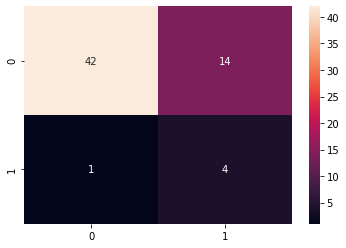

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(predit_ANN, y_test1))

              precision    recall  f1-score   support

           1       0.98      0.75      0.85        56
           2       0.22      0.80      0.35         5

    accuracy                           0.75        61
   macro avg       0.60      0.78      0.60        61
weighted avg       0.91      0.75      0.81        61



In [ ]:
print(metrics.accuracy_score(predit_ANN, y_test1))

0.7540983606557377


In [ ]:
acc_score = []
range_list = range(5,30)
for k in range_list:
  CLF2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, k), random_state=1)
  CLF2.fit(x_train1, y_train1)
  prd = CLF2.predict(x_test1)
  acc_score.append(metrics.accuracy_score(prd, y_test1))


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
acc_score

[0.7049180327868853,
 0.7704918032786885,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7704918032786885,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7704918032786885,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7540983606557377,
 0.7049180327868853,
 0.7704918032786885,
 0.7704918032786885,
 0.7049180327868853,
 0.7704918032786885,
 0.7049180327868853]

Text(0, 0.5, 'acc')

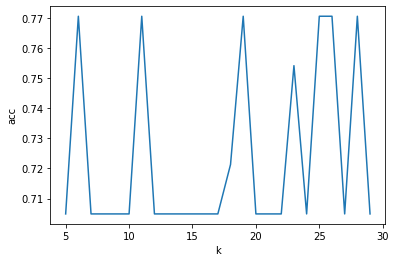

In [ ]:
plt.plot(range_list,acc_score)
plt.xlabel('k')
plt.ylabel('acc')

In [ ]:
max(acc_score)

0.7704918032786885

In [ ]:
start_time = time.time()
CLF2.fit(x_train_scaler, y_train)
yy_preidct=CLF2.predict(x_test_scaler1)
print("time - {}".format(time.time()-start_time))


time - 0.19336724281311035


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
y_predict_KNN_scaled2 = CLF2.predict(x_test_scaler)
print(metrics.accuracy_score(yy_preidct, y_test1))
mean_squared_error(yy_preidct, y_test1)
print(sqrt(metrics.mean_squared_error(y_test1, predict_clf)))


0.7049180327868853
0.5432144762551112


In [ ]:
CM = confusion_matrix(y_predict_KNN_scaled2, y_test1)

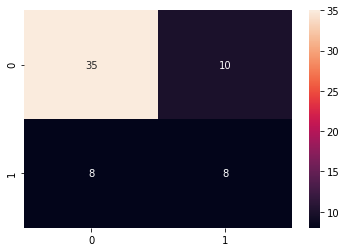

In [ ]:
sns.heatmap(CM, annot=True)

In [ ]:
print(classification_report(y_predict_KNN_scaled2, y_test1))

              precision    recall  f1-score   support

           1       0.81      0.78      0.80        45
           2       0.44      0.50      0.47        16

    accuracy                           0.70        61
   macro avg       0.63      0.64      0.63        61
weighted avg       0.72      0.70      0.71        61



In [ ]:
model_list = ['SVC', 'SVC_scaled', 'KNN', 'KNN_scaled', 'K_optimal', 'GaussianNB', 'random_forest', 'MLPClassifier']
accuracy_models_list = [0.7213114754098361, 0.7049180327868853, 0.7704918032786885, 0.7704918032786885, 0.7868852459016393, 0.7377049180327869, 0.7049180327868853, 0.7540983606557377]

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

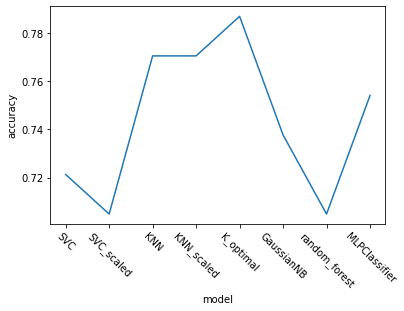

In [ ]:
plt.plot(model_list, accuracy_models_list)
plt.xlabel('model')
plt.ylabel('accuracy')
plt.xticks(rotation=-45)


In [ ]:
import numpy as np
x = np.arange(len(model_list))

In [ ]:
dict = {'SVC':0.7213114754098361, 'SVC_scaled':0.7049180327868853, 'KNN':0.7704918032786885, 'KNN_scaled':0.7704918032786885, 'K_optimal':0.7868852459016393, 'GaussianNB':0.7377049180327869, 'random_forest':0.7049180327868853, 'MLPClassifier':0.7540983606557377}

In [ ]:
pd_df = pd.DataFrame(list(dict.items()))

In [ ]:
pd_df.columns=['model_list', 'accuracy_models_list']

In [ ]:
plt.figure(figsize=(90,8))


<Figure size 6480x576 with 0 Axes>

<Figure size 6480x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


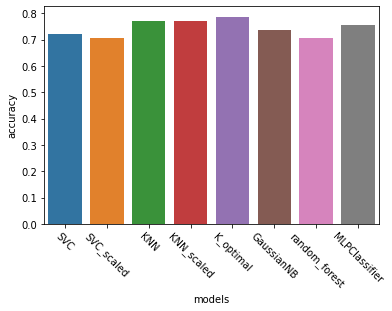

In [ ]:
ax = sns.barplot(pd_df.index, pd_df.accuracy_models_list)
ax.set(xlabel="models", ylabel='accuracy')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=model_list)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
Time rfc = 0.16573548316955566
gaussian scaled = 0.004734516143798828, acc = 0.7049180327868853
rfc scaled = 0.17505574226379395, 0.7049180327868853
gaussian = 0.0029616355895996094
scaled knn = 0.010120391845703125
knn = 0.0017919540405273438
scaled svc = 0.01349496841430664
svc = 0.007276058197021484
mlp = 0.024126052856445312
mlp scaled = 0.16303730010986328

SyntaxError: ignored

In [ ]:
from sklearn.metrics import plot_roc_curve

classifiers = [svc_model, knn, gnb, clf, CLF]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, x_test, y_test, ax=ax)
    plt.xlabel("TP(Sensitivity)", fontsize=15)
    plt.ylabel("FP(Specifity)", fontsize=15)

